# IIVP - Project 1
### 6252320 - Leon Debnath

Import the required modules for the notebook

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math

In [2]:
def display(images, labels, axis='off', cmap=None, figsize=(15,10)):
    
    if len(images) != len(labels):
        raise Exception("images and labels don't correspond")
        
    fig = plt.figure(figsize=figsize)
    cols = 2
    rows = math.ceil(len(images)/2)
    
    for i in range(len(images)):
        fig.add_subplot(rows, cols, i+1)
        plt.imshow(images[i], cmap=cmap)
        plt.title(labels[i])
        plt.axis(axis)

## Exercise 1

## Exercise 2

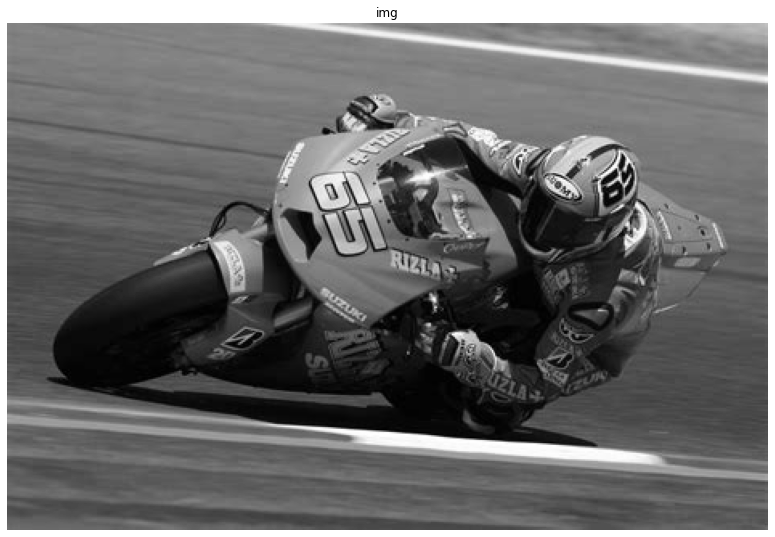

In [3]:
from scipy import fftpack
from numpy import pi
from numpy import r_

img = cv2.cvtColor(cv2.imread('images/motogp.jpeg'), cv2.COLOR_BGR2GRAY)

display([img],['img'], cmap='gray', figsize=(30,10))

## 2.1 Watermark Insertion

In [4]:
def dct2(a):
    return fftpack.dct( fftpack.dct( a.T, norm='ortho' ).T, norm='ortho' )


def dct(img, block_size=8):
    
    dct = np.zeros(img.shape)

    for i in r_[:img.shape[0]: block_size]:
        for j in r_[:img.shape[1]: block_size]:
            dct[i: i + block_size, j: j + block_size] = dct2(img[i:i+ block_size, j: j+ block_size])
            
    return dct

In [5]:
def idct2(a):
    return fftpack.idct( fftpack.idct( a.T , norm='ortho').T,norm='ortho')        
        
def idct(img_dct, block_size=8):
    
    img = np.zeros(img_dct.shape)
    
    for i in r_[:img.shape[0]: block_size]:
        for j in r_[:img.shape[1]: block_size]:
            img[i:(i + block_size), j:(j + block_size)] = idct2( img_dct[i:(i + block_size),j:(j + block_size)])
    
    return img

In [6]:
def apply_threshold(img_dct, threshold):
    
    return img_dct * (abs(img_dct) > (threshold * np.max(img_dct)))
    

In [7]:
def filter_k(block, k):
    """ Return the K (absolute) largest values in the same location as found in the block """
    oput = np.zeros(block.shape)
    block_abs = np.abs(block)
    
    for i in range(k):
        r, c = np.unravel_index(np.argmax(block_abs, axis=None), block_abs.shape)
        oput[r,c] = block[r,c]
        block_abs[r,c] = 0;
        
    return oput
        
def filter_k_highest(img_dct, k, block_size=8):
    oput = np.zeros(img_dct.shape)
    
    for i in r_[:img_dct.shape[0]: block_size]:
        for j in r_[:img_dct.shape[1]: block_size]:
            oput[i:(i + block_size), j:(j + block_size)] = filter_k(img_dct[i:(i + block_size),j:(j + block_size)], k)
    
    return oput

### 2.1.1 - Compute the 2-D DCT

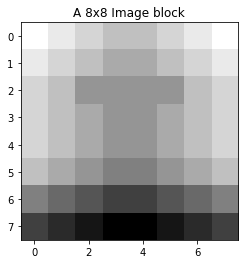

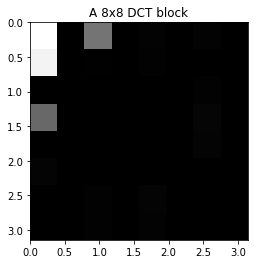

In [8]:
pos = 0
block_size=8

img_dct = dct(img)

# Extract a block from image
plt.figure()
plt.imshow(img[pos: pos + block_size, pos: pos + block_size], cmap='gray')
plt.title(f"A {block_size}x{block_size} Image block")

# Display the dct of that block
plt.figure()
plt.imshow(img_dct[pos: pos + block_size, pos: pos + block_size],
           cmap='gray',
           vmax=np.max(img_dct) * 0.01,
           vmin=0,
           extent=[0,pi,pi,0])

plt.title(f"A {block_size}x{block_size} DCT block");

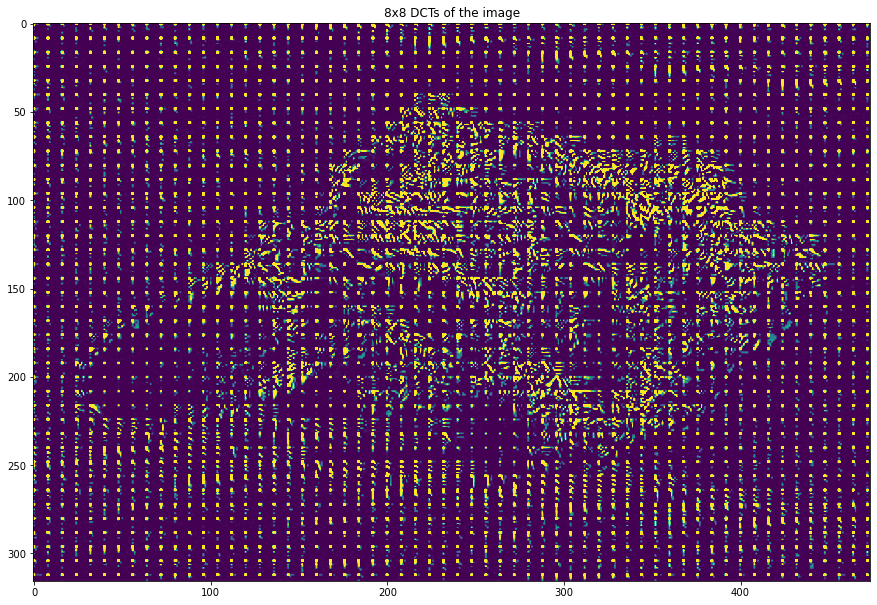

In [9]:
# Display entire DCT
plt.figure(figsize=(15,15))
plt.imshow(img_dct, vmax = np.max(img_dct)*0.01, vmin = 0)
plt.title( "8x8 DCTs of the image");

### 2.1.2 - Choose the $K$ Largest Coeficients 

In [10]:
x = [x * 0.0005 for x in range(1, 50)]
thresholds = {}
coeficients = {}

for key in x:
    thresholds[key] = apply_threshold(img_dct, key)
    coeficients[key] = 100 * np.sum(thresholds[key] != 0.0 ) / (img.shape[0] * img.shape[1] * 1.0)
    
# keys = list(thresholds.keys())
# imgs = list(thresholds.values())
# display(imgs, keys, cmap='gray', figsize=(15,25))

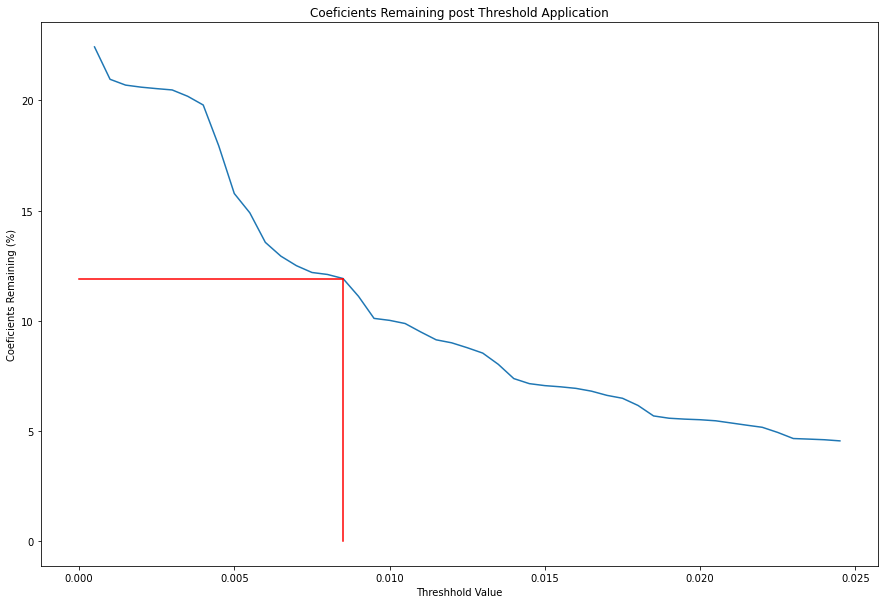

In [11]:
plt.figure(figsize=(15,10))
plt.plot(list(coeficients.keys()), list(coeficients.values()))
plt.plot([0.0085, 0.0085],[0, 11.9], 'r')
plt.plot([0, 0.0085],[11.9, 11.9], 'r')
plt.title('Coeficients Remaining post Threshold Application')
plt.xlabel('Threshhold Value')
plt.ylabel('Coeficients Remaining (%)');

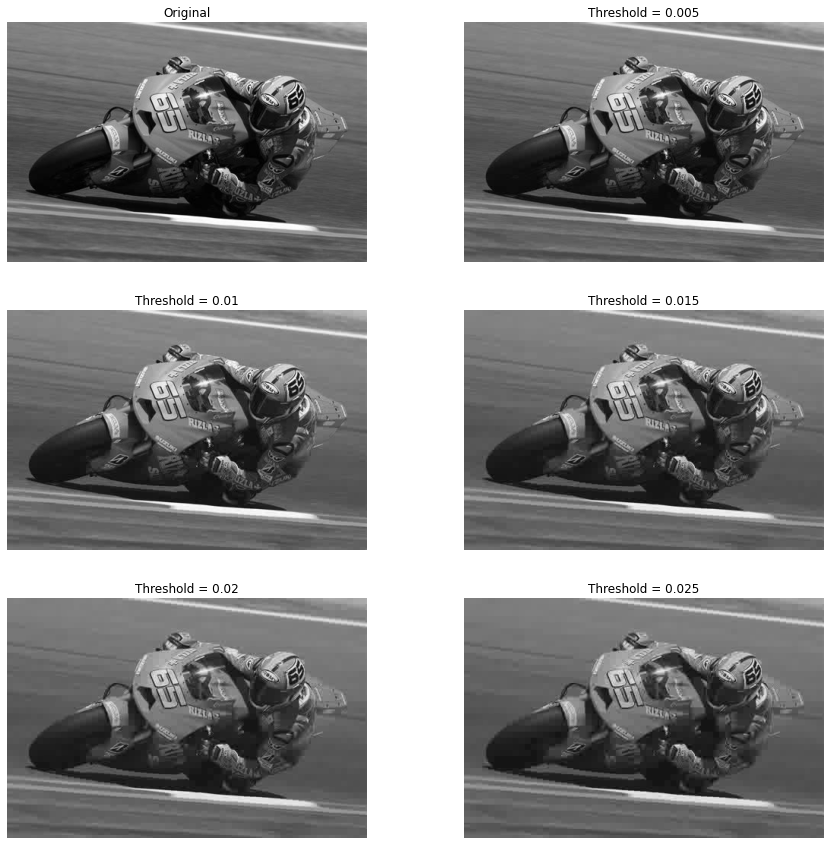

In [12]:
transformed = idct(apply_threshold(img_dct, 0.001))

display([img, 
         idct(apply_threshold(img_dct, 0.005)),
         idct(apply_threshold(img_dct, 0.01)),
         idct(apply_threshold(img_dct, 0.015)),
         idct(apply_threshold(img_dct, 0.02)),
         idct(apply_threshold(img_dct, 0.025))],
        ['Original',
         'Threshold = 0.005',
         'Threshold = 0.01',
         'Threshold = 0.015',
         'Threshold = 0.02',
         'Threshold = 0.025'],
        figsize=(15,15),
        cmap='gray')

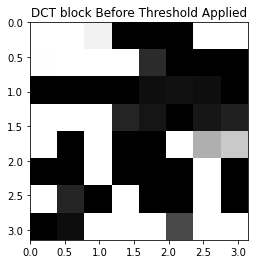

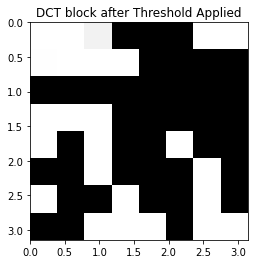

In [13]:
x_pos = 100
y_pos = 200
block_size=8

img_dct = dct(img)

# Display the dct of that block
plt.figure()
plt.imshow(img_dct[x_pos: x_pos + block_size, y_pos: y_pos + block_size],
           cmap='gray',
           vmax=np.max(img_dct) * 0.01,
           vmin=0,
           extent=[0,pi,pi,0])
plt.title(f"DCT block Before Threshold Applied");

img_dct_t = apply_threshold(img_dct, 0.0085)

# Display the dct of that block
plt.figure()
plt.imshow(img_dct_t[x_pos: x_pos + block_size, y_pos: y_pos + block_size],
           cmap='gray',
           vmax=np.max(img_dct) * 0.01,
           vmin=0,
           extent=[0,pi,pi,0])

plt.title(f"DCT block after Threshold Applied");

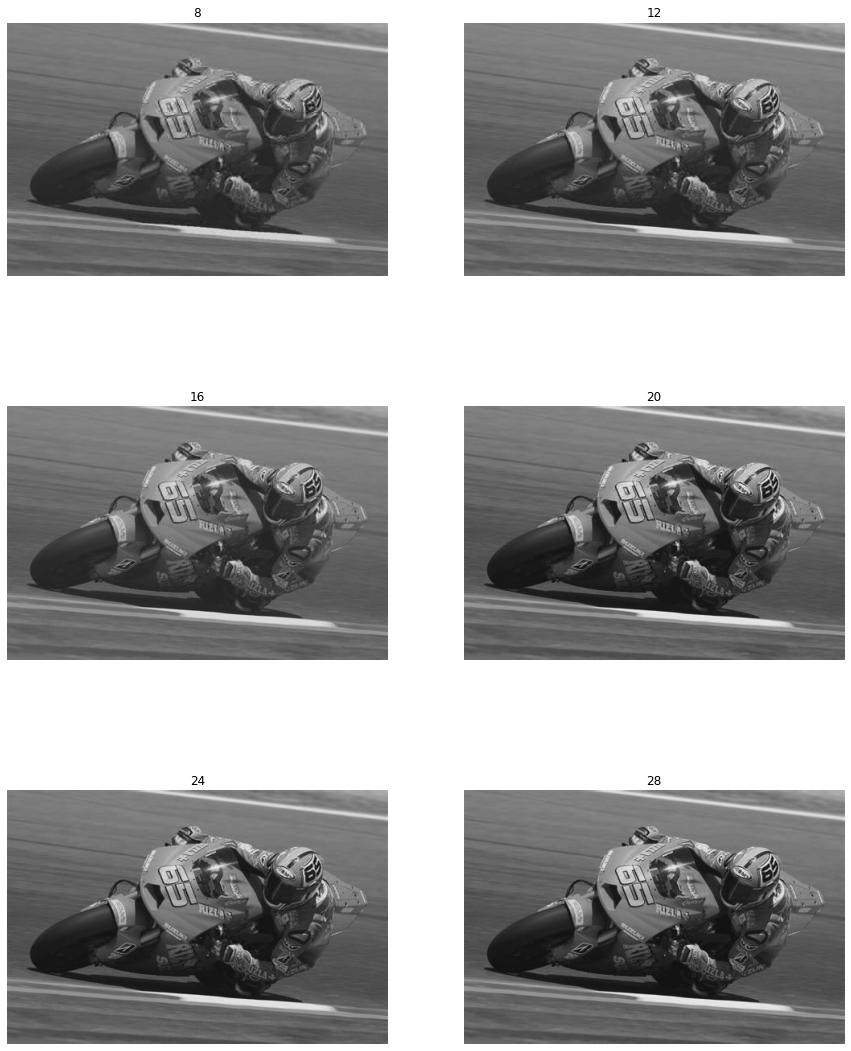

In [14]:
K = [n for n in range(8,32,4)]

images = {}

for k in K:
    images[k] = idct(filter_k_highest(img_dct, k))
    
values = list(images.values())
keys = list(images.keys())
display(values, keys, cmap='gray', figsize=(15, 20))


### 2.1.3 - Create a watermark

In [15]:
k = 32
mu = 0
sigma = 1
alpha = 0.1

w = np.random.default_rng().normal(size=(k,))
print(w)

[ 1.08614459 -1.50375493  0.05009753 -0.34528497 -0.34732553 -1.97336493
 -1.17901409  0.23801489  0.07935013 -0.62562037  0.10825056  0.7267726
  2.02755646 -0.5587395  -0.37362087 -1.5727188   0.30920832 -0.04836906
  0.50926319  0.2284456  -0.08620517 -1.14629319 -0.65639652  0.1517509
 -0.62149423  0.98040257  0.03800036  0.03524918  1.15027881  1.1873665
  0.07366591 -2.42790404]


### 2.1.4 - Embed a Watermark

In [16]:
def watermark_block(block, w):
    oput = np.zeros(block.shape)
    block_abs = np.abs(block)
    
    for w_i in w:
        r, c = np.unravel_index(np.argmax(block_abs, axis=None), block_abs.shape)
        oput[r,c] = block[r,c] * (1 + alpha * w_i)
        block_abs[r,c] = 0;
    
    oput[0,0] = block[0,0]     
    return oput
        
def watermark(img_dct, w, block_size=8):
    oput = np.zeros(img_dct.shape)
    
    for i in r_[:img_dct.shape[0]: block_size]:
        for j in r_[:img_dct.shape[1]: block_size]:
            oput[i:(i + block_size), j:(j + block_size)] = watermark_block(img_dct[i:(i + block_size),j:(j + block_size)], w)
    
    return oput

### 2.1.5 - Create the Watermarked DCT

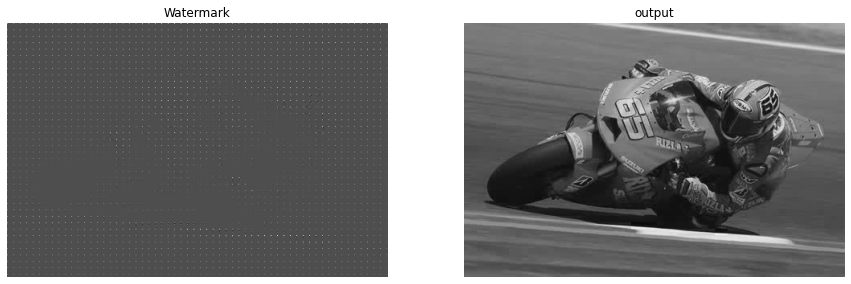

In [17]:
img_w = watermark(img_dct_t, w)

display([img_w, idct(img_w)],['Watermark', 'output'], cmap='gray')

### 2.1.6 - Comparison

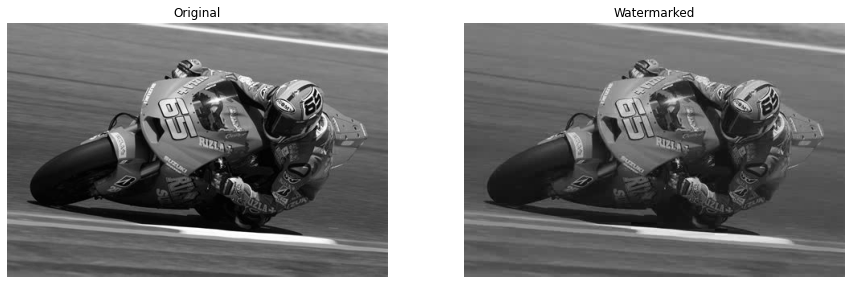

In [18]:
display([img, idct(img_w)], ['Original', 'Watermarked'], cmap='gray')

### 2.1.7 - Histogram

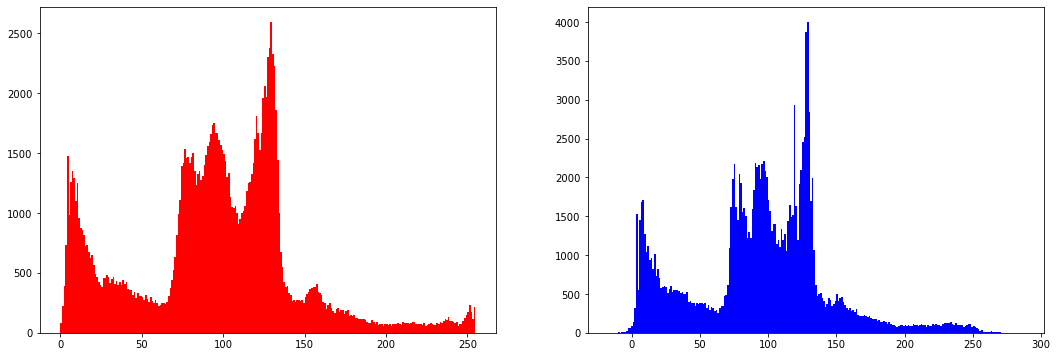

In [19]:
img_flattened = np.reshape(img, (img.shape[0] * img.shape[1],))
w_flattened = np.reshape(idct(img_w), (img_w.shape[0] * img_w.shape[1],))

fig = plt.figure(figsize=(18,6))
fig.add_subplot(1, 2, 1)
plt.hist(img_flattened, bins=255, color='red');
fig.add_subplot(1, 2, 2)
plt.hist(w_flattened, bins=255, color='blue');

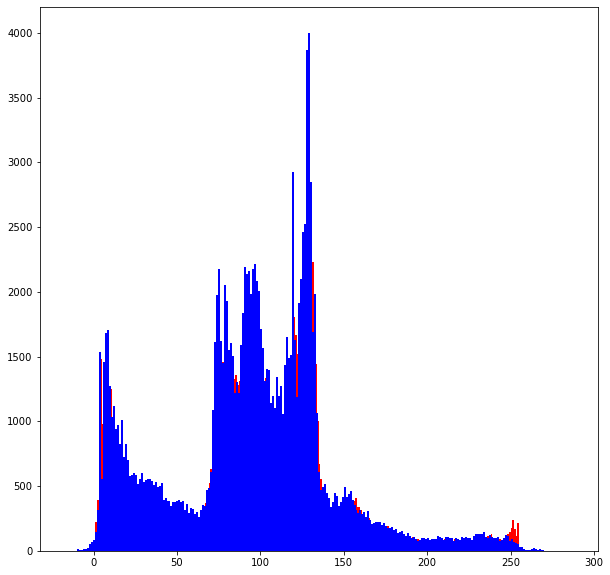

In [20]:
plt.figure(figsize=(10,10))
plt.hist(img_flattened, bins=255, color='red');
plt.hist(w_flattened, bins=255, color='blue');

### 2.1.8 - DC Coefficient
TODO - Explain

## 2.2 - Watermark Detection

### 2.2.1 - Compute the 2D DCT

In [21]:
mystery_1 = img
mystery_2 = idct(img_w)
m1_dct = dct(mystery_1)
m2_dct = dct(mystery_2)

## 2.2.2 - Keep the K largest non-DC coefficients

In [22]:
def remove_DC(img_dct):
    oput = img_dct
    
    for i in r_[:img_dct.shape[0]: block_size]:
        for j in r_[:img_dct.shape[1]: block_size]:
            
            oput[i, j] = 0
    
    return oput

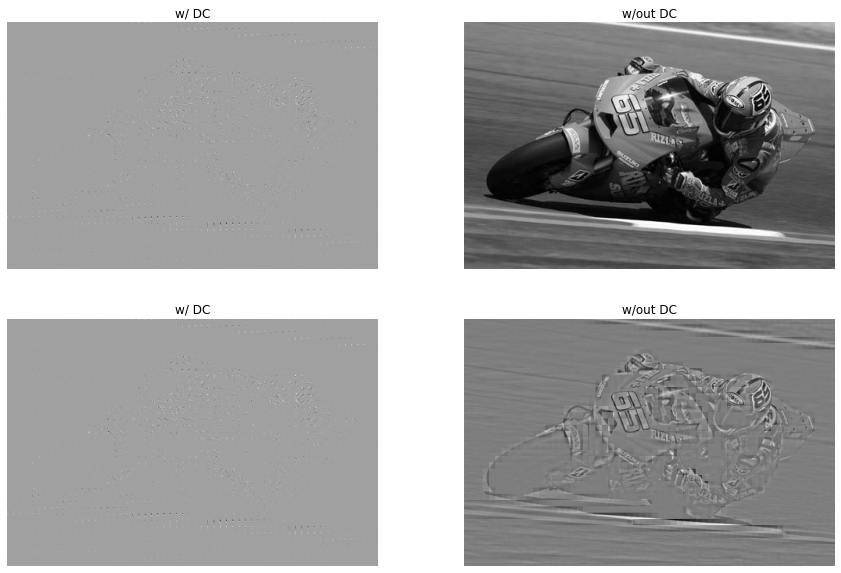

In [23]:
dc_less = remove_DC(m1_dct)
display([m1_dct, mystery_1, dc_less, idct(dc_less)],['w/ DC', 'w/out DC', 'w/ DC', 'w/out DC'], cmap='gray')

In [24]:
m1_dct_filtered = filter_k_highest(m1_dct, k)
m2_dct_filtered = filter_k_highest(m2_dct, k)

In [25]:
def compare_block(c_hat, c, k):
    w_hat = []
    c_hat = np.abs(c_hat)
    c_act = np.abs(c)
    
    c_hat[0, 0] = 0
    
    for i in range(k):
        r, c = np.unravel_index(np.argmax(c_hat, axis=None), c_hat.shape)
        
        denom = (alpha * c_act[r, c])
        numer = (c_hat[r, c] - c_act[r, c])
        
        if denom != 0:
            w_hat.append(numer/denom)
        else:
            w_hat.append(0)
                 
        c_hat[r, c] = 0
              
    return w_hat

In [26]:
def estimate_watermark(img_a, img_b, k, block_size=8):
    w_hat = []
    
    for i in r_[:img_dct.shape[0]: block_size]:
        for j in r_[:img_dct.shape[1]: block_size]:
            
            c_hat = img_a[i:(i + block_size),j:(j + block_size)]
            c = img_b[i:(i + block_size),j:(j + block_size)]
            
            w_i = compare_block(c_hat, c, k)
            w_hat.append(w_i)
    
    return np.asarray(w_hat)

In [27]:
w_hats = estimate_watermark(m1_dct_filtered, m2_dct_filtered, k)
print(w_hats.shape)

np.max(w_hats)

(2400, 32)


1.1315009738357431e+18

In [28]:
w

array([ 1.08614459, -1.50375493,  0.05009753, -0.34528497, -0.34732553,
       -1.97336493, -1.17901409,  0.23801489,  0.07935013, -0.62562037,
        0.10825056,  0.7267726 ,  2.02755646, -0.5587395 , -0.37362087,
       -1.5727188 ,  0.30920832, -0.04836906,  0.50926319,  0.2284456 ,
       -0.08620517, -1.14629319, -0.65639652,  0.1517509 , -0.62149423,
        0.98040257,  0.03800036,  0.03524918,  1.15027881,  1.1873665 ,
        0.07366591, -2.42790404])

## 4.1 - Principal Component Analysis

(900, 600, 3)


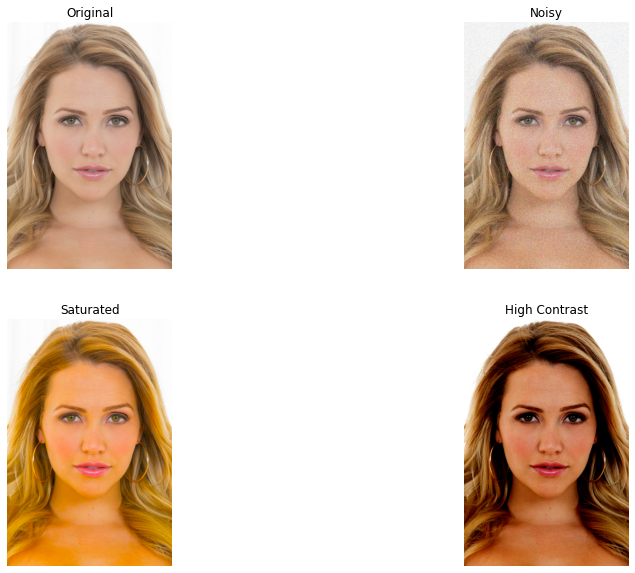

In [61]:
faces = []

faces.append(cv2.cvtColor(cv2.imread('images/face01_o.jpeg'), cv2.COLOR_BGR2RGB))
faces.append(cv2.cvtColor(cv2.imread('images/face01_n.jpeg'), cv2.COLOR_BGR2RGB))
faces.append(cv2.cvtColor(cv2.imread('images/face01_s.jpeg'), cv2.COLOR_BGR2RGB))
faces.append(cv2.cvtColor(cv2.imread('images/face01_c.jpeg'), cv2.COLOR_BGR2RGB))

print(faces[0].shape)
display([faces[0], faces[1], faces[2], faces[3]], ['Original', 'Noisy', 'Saturated', 'High Contrast'])

In [172]:
# 1. Format the data into a matrix of points where each image is a vector of m * n (900 * 600)   
lst = []

for face in faces:
    m, n, c = face.shape
    lst.append(np.reshape(face, m * n * c))
    
M_data = np.stack(lst, axis=1)
print(M_data.shape)

(1620000, 4)


In [173]:
# 2. Calculate the Mean vectors
mean = np.mean(M_data, axis=0)
print(mean)
print(mean.shape)

[155.37515    154.30979198 141.67874198 108.34373272]
(4,)


In [174]:
# 3. Subtract Mean from data matrix  (M = M_data - x_mean)
M_data = np.subtract(M_data, mean)
M_data.shape

(1620000, 4)

In [175]:
# 4. Calculate the Covariance matrix  (C = M * M ^T)
C = np.dot(M_data.T, M_data)
print(C)

[[5.14555446e+09 4.97715050e+09 6.80079944e+09 7.53629031e+09]
 [4.97715050e+09 5.78845377e+09 6.60586838e+09 7.28218645e+09]
 [6.80079944e+09 6.60586838e+09 1.05861317e+10 1.01718563e+10]
 [7.53629031e+09 7.28218645e+09 1.01718563e+10 1.14368714e+10]]


In [176]:
# 5. Calculate the Eigen vectors and Eigen values of the covariance matrix
np.linalg.eig(C)

(array([3.09320757e+10, 1.12541140e+08, 7.08732946e+08, 1.20366147e+09]),
 array([[ 0.40147619,  0.86460067, -0.26277838, -0.14909752],
        [ 0.40133639, -0.11298708,  0.61903838, -0.66554828],
        [ 0.56421955, -0.01487997,  0.40490268,  0.71936688],
        [ 0.59950168, -0.48936508, -0.61951015, -0.131631  ]]))

In [177]:
# PCA Steps:

# 1. Format the data into a matrix of points where each is a vector [x, y, z] (M_data)

# 2. Calculate the Mean vector  (x_mean)

# 3. Subtract Mean from data matrix  (M = M_data - x_mean)

# 4. Calculate the Covariance matrix  (C = M * M ^T)

# 5. Calculate the Eigen vectors and Eigen values of the covariance matrix

In [178]:
mean, eigenVectors = cv2.PCACompute(M_data, mean=None, maxComponents=10, )

In [179]:
print(mean)

[[-3.45422852e-10  2.45886868e-10  3.28427372e-10  3.71140015e-10]]


In [180]:
print(eigenVectors)

[[ 0.40147619  0.40133639  0.56421955  0.59950168]
 [ 0.14909752  0.66554828 -0.71936688  0.131631  ]
 [-0.26277838  0.61903838  0.40490268 -0.61951015]
 [ 0.86460067 -0.11298708 -0.01487997 -0.48936508]]
